In [0]:
import requests
from bs4 import BeautifulSoup
from IPython.core.display import HTML
import pandas as pd
import numpy as np
%matplotlib inline

In [0]:
req = requests.get("https://en.wikipedia.org/wiki/Harvard_University")
req

In [0]:
type(req)


In [0]:
page = req.text
page

In [0]:
soup = BeautifulSoup(page, 'html.parser')
soup
type(page)
type(soup)
[t['class'] for t in soup.find_all('table') if t.get('class')]

In [0]:
table_html = str(soup.find("table", "wikitable"))
table_html
HTML(table_html)

In [0]:
# Lambda expressions return the value of the expression inside it.
# In this case, it will return a string with new line characters replaced by spaces.
rem_nl = lambda s: s.replace("\n", " ")

In [0]:
row = [row for row in soup.find("table", "wikitable").find_all('tr')[1:]]
row[0]
r = [rem_nl(r.get_text()) for r in row[0].find_all('th')]
r

In [0]:
def power(x):
  return x**2
print(power(5))

In [0]:
def get_multiple(x, y=1):
    return x*y

print("With x and y: ", get_multiple(y=10, x=3))
print("With x only: ", get_multiple(10))

In [0]:
def print_special_greeting(name, leaving=False, condition="nice"):
    print("Hi", name)
    print("How are you doing in this", condition, "day?")
    if leaving:
        print ("Please come back!")
print_special_greeting("John")
print_special_greeting("John", True, "rainy")
print_special_greeting("John", True)
print_special_greeting("John", condition="horrible")

In [0]:
def print_siblings(name, *siblings):
    print(name, "has the following siblings:")
    for sibling in siblings:
        print (sibling)
    print()
        
print_siblings("John", "Ashley", "Lauren", "Arthur")
print_siblings("Mike", "John")
print_siblings("Terry")

In [0]:
def print_brothers_sisters(name, **siblings):
    print(name, "has the following siblings:")
    for sibling in siblings:
        print(sibling, ":", siblings[sibling])
    print()
    
print_brothers_sisters("John", Ashley="sister", Lauren="sister", Arthur="brother")

Now let's do the same for the rows. Notice that since we have already parsed the header row, we will continue from the second row. The [1:] is a slice notation and in this case it means we want all values starting from the second position.

In [0]:
indexes = [r.find("td").get_text() for r in row[1:]]
indexes

In [0]:
values = [rem_nl(value.get_text()) for r in row[1:] for value in r.find_all("td")]
s = values[1:len(values):2]
s

In [0]:
stacked_values = zip(*[s[i::3] for i in range(len(r))])
stacked_values


In [0]:
to_num = lambda s:s[-1] =="" and int(s[-1]) or None
to_num

In [0]:
HTML(table_html)

In [0]:
def print_args(arg1, arg2, arg3):
    print(arg1, arg2, arg3,"hai")

# Print three numbers.
print_args(1, 2, 3)

# Print three lists.
print_args([1, 10], [2, 20], [3, 30])

In [0]:
parameters = [100, 200, 300]

p1 = parameters[0]
p2 = parameters[1]
p3 = parameters[2]

print_args(p1, p2, p3)

In [0]:
p4, p5, p6 = parameters

print_args(p4, p5, p6) 


In [0]:
print_args(*parameters)

In [0]:
{ind: value for ind, value in zip(indexes, s)}


In [0]:
column1 = []
column1 = r[0]

df = pd.DataFrame(s, columns=["Ranking"], index=indexes)
df
#print(len(r),len(s),len(indexes))
df


In [0]:
stacked_by_col = [s[i::3] for i in range(len(r))]
stacked_by_col

In [0]:
data_lists = {col: val for col, val in zip(r, stacked_by_col)}
data_lists

In [0]:
df.dtypes


In [0]:
df.dropna()

In [0]:
df.dropna(axis=0)


In [0]:
df_clean = df.fillna(0).astype(int)
df_clean

In [0]:
df_clean.describe()

In [0]:
df_clean.dtypes

In [0]:
df_clean.values

In [0]:
type(df_clean.values)

In [0]:
np.mean(df_clean.Ranking)

In [0]:
np.std(df_clean)

In [0]:
df_clean['Ranking']

In [0]:
df_clean.Ranking

In [0]:
df_clean.loc["Business"]

In [0]:
df_clean.iloc[0]

In [0]:
df_clean.ix["Business"]

In [0]:
df_flat = df_clean.stack().reset_index()
df_flat.columns = ["race", "Ranking", "percentage"]
df_flat

In [338]:
grouped = df_flat.groupby("race")
grouped.groups
type(grouped)
mean_percs = grouped.mean()
mean_percs
type(mean_percs)

pandas.core.frame.DataFrame

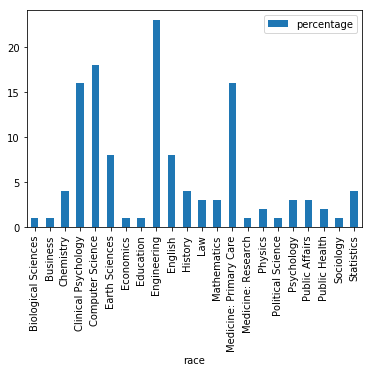

In [341]:
mean_percs.plot(kind="bar");